In [1]:
import numpy as np
#from scipy.interpolate import RectBivariateSpline
import scipy.interpolate as interpolate
import datetime as dt
import os
from copy import deepcopy as cp
import netCDF4 as nc
import sys
from dask import delayed
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#import warnings
# Import writer class from csv module
from csv import writer
import xarray as xr
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

In [2]:
SCENARIO_COMBNATION = ['crop-ctl','frst-ctl','irri-crop']
region_list= ['NAM', 'CE', 'CSAM', 'CAF', 'ESAM', 'SAF', 'SEAS']
scenario_title=['CROP-CTL','FRST-CTL','IRR-CROP']
y_axis_text1=['       Vegetation C changes   \nper 100 million hectares of land\n                   (GtC)','','']

labels = [
    "WNA",  # Western North America
    "EES",  # East Europe Siberia
    "WAB",  # Western Amazon Basin
    "CCB",  # Central Congo Basin
    "EAB",  # Eastern Amazon Basin
    "SCP",  # Southern Congo Periphery
    "EC"    # Eastern China
]
number=['a','b','c']

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


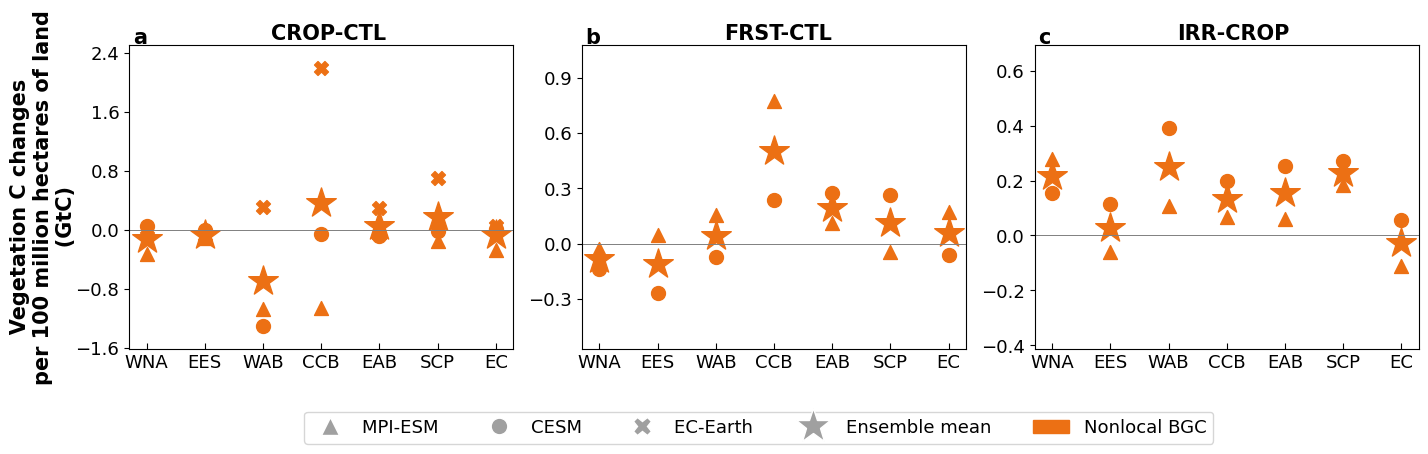

In [3]:
# this script calculate the BGC effects perarea of LUC. for example, the BGC effects of unit area of afforestation or cropland expansion. this can only conduct for CESM and MPI-ESM.
#fig = plt.figure(constrained_layout= False)
#fig.subplots_adjust(wspace= -0.5, hspace= 0)
#subfigs = fig.subfigures(1, 3,  wspace= -0.5, hspace= 0)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

#subfigs.layout(None)
#subfigs.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout(pad= 0)
#fig.set_size_inches(20, 4)
for j, SCENARIO in enumerate(SCENARIO_COMBNATION):
 mpi_value = []
 cesm_value = []
 ecearth_value = []

 for i, region_source in enumerate(region_list):     
    mpiesm_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/' + region_source + \
                                             '/cVeg/Eluc_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + region_source + '.nc')
     # mpiesm_cland_dir_cLand.cLand_local.values[0][0][0]*-1000: the direct AFOLU emission(regional integrated local BGC effects) of $region_source;
     # mpiesm_cland_dir_cLand.cLand_nonlocal.values[0][0][0]*-1000:the regional integrated nonlocal BGC effect of $region_sources(caused by the global AFOLU induced nonlocal BGP effects on this unchanged region-$region_source)     
    cesm_cland_dir_cLand= xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/' + region_source + \
                                          '/TOTVEGC/Eluc_' + SCENARIO + '_cesm_last30mean_' + region_source + '.nc')
    if SCENARIO == 'irri-crop':
        ecearth_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/RTCRE_regional/perarea/' + region_source + \
                                              '/cVeg/Eluc_irr-crop_ecearth_last30mean_gridlevelsep_' + region_source + '.nc')
    else:
        ecearth_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/RTCRE_regional/perarea/' + region_source + \
                                              '/cVeg/Eluc_' + SCENARIO + '_ecearth_last30mean_gridlevelsep_' + region_source + '.nc')
    # if region_source == 'NAM':
    mpi=mpiesm_cland_dir_cLand.cVeg_nonlocal.values[0][0][0]*-1000  # 1 EgC=1000 GtC multiplying 1000 is used to converting EgC to GtC
    cesm=cesm_cland_dir_cLand.TOTVEGC_nonlocal.values[0][0][0]*-1000
    if j==0:
        ecearth=ecearth_cland_dir_cLand.cVeg_nonlocal.values[0][0][0]*-1000
    else:
        ecearth=np.nan
    #mpiesm_luc.total_interpolated =the cover fraction of cropland expension   
    
    ecearth_value.append(ecearth)
    cesm_value.append(cesm)
    mpi_value.append(mpi)

 ensemble_arr=[cesm_value,mpi_value,ecearth_value]
 ensemble= np.nanmean(ensemble_arr,axis=0)
 #subfig = subfigs[j]
 #ax = subfig.subplots(1, 1)
 ax = axes[j]
 #plt.figure(figsize=(17.5, 6))
 #labels = ['CAF','CE','CSAM','ESAM','NAM','SAF','SEAS']
 labels_1 = ['','','','','','','']
 x = [1,1.25,1.5,1.75,2,2.25,2.5]  # the label locations
 ax.set_position([0.016, 0.01, 0.8, 0.93])
 rects1 = ax.scatter(x, mpi_value,marker= '^',s=100, color="#EC7014", label='mpiesm')
 rects2 = ax.scatter(x, cesm_value,marker= 'o',s=100, color="#EC7014", label='cesm') 
 rects3 = ax.scatter(x, ecearth_value,marker= 'X',s=100, color="#EC7014", label='ecearth')
 rects10 = ax.scatter(x, ensemble, marker= '*', s=500, color="#EC7014", label='mean')
 ax.set_xticks(x)
 ax.tick_params(axis='x', direction='in', length=4, labelsize=12)
 ax.set_xticklabels(labels, fontsize=13)
 ax.text(0.37, 1.04, scenario_title[j], fontsize=15, rotation=0,fontweight='bold',
     verticalalignment='center', horizontalalignment='left', transform=ax.transAxes)
 if SCENARIO == 'crop-ctl':
     ax.text(-0.31, 0.5,y_axis_text1[j], fontsize=15, rotation=90,fontweight='bold',
         verticalalignment='center', horizontalalignment='left', transform=ax.transAxes)   
 ax.text(0.01, 1.06,number[j] , fontsize=15, rotation=0,fontweight='bold',
         verticalalignment='top', horizontalalignment='left', transform=ax.transAxes)  
 ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
 ax.tick_params(axis='y', labelsize=13)
 all_values_ax1 = np.concatenate([mpi_value,cesm_value,ecearth_value,ensemble])
 all_values_ax1 = all_values_ax1[np.isfinite(all_values_ax1)]
 #ax1.set_ylim([np.min(all_values_ax1) -5, np.max(all_values_ax1) +5])
 ax.set_ylim([np.min(all_values_ax1) -0.3, np.max(all_values_ax1) +0.3])

 ax.axhline(0,color='grey',linewidth = 0.7)
 all_values_ax = np.concatenate([mpi_value,cesm_value,ensemble])
legend_elements = [Line2D([0], [0], marker='^', color='w', label='MPI-ESM ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='o', color='w', label='CESM ', markerfacecolor='#A0A0A0', markersize=12),
                   Line2D([0], [0], marker='X', color='w', label='EC-Earth ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='*', color='w', label='Ensemble mean ', markerfacecolor='#A0A0A0', markersize=26),
                   Patch(color='#EC7014', label='Nonlocal BGC')
                  ] 
font_properties = FontProperties()
font_properties.set_family('serif')  # Set font family
font_properties.set_name('Times New Roman')  # Specific font name
#font_properties.set_weight('bold')  # Set font weight to bold
font_properties.set_size(13)  # Set font size

fig.legend(handles=legend_elements, loc='lower center',bbox_to_anchor=(0.55, -0.14),ncol=5,prop=font_properties )    
 #for k, txt in enumerate(np.round(ensemble, decimals=3)):
     #ax.annotate(txt, (x[k], np.min(all_values_ax) -0.05),fontsize=11,rotation=20)
     
 #for k, txt in enumerate(np.round(mpi_value, decimals=3)):
     #ax.annotate(txt, (x[k], np.min(all_values_ax) +0.15),fontsize=11,rotation=20)
     
 #for k, txt in enumerate(np.round(cesm_value, decimals=3)):
    # ax.annotate(txt, (x[k], np.min(all_values_ax) +0.35),fontsize=11,rotation=20)

 #for k, txt in enumerate(np.round(ecearth_value, decimals=3)):
     #ax.annotate(txt, (x[k], np.min(all_values_ax) +0.55),fontsize=11,rotation=20)
         
    #ax1.legend([rects1,rects3,rects5,rects10], ['mpiesm','cesm','ecearth','ensemble mean'], fontsize = 20) 
    #rects1.refline(y = 0, color = "grey", linewidth = 0.0001)#2ca25f
plt.subplots_adjust(wspace=-0.5, hspace=None)
plt.tight_layout()
#fig.savefig('/work/bm1147/b380949/web-monitoring/secP/supplement_nonlocal_cVeg_regional_compare/' + 'supplement_nonlocal_cVeg_Eluc_perarea_withdata.png', format = 'png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    #ax1.legend([(rects1,rects2),(rects3,rects4),(rects5,rects6)], ['mpiesm','cesm','ecearth'], fontsize = 20)
#fig.savefig('/work/bm1147/b380949/web-monitoring/secP/supplement_nonlocal_cVeg_regional_compare/' + 'NC-Fig6_nonlocal_cVeg_perarea_withoutdata.jpg', format = 'jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig('/scratch/b/b380949/' + 'NC-Fig6_nonlocal_cVeg_perarea_withoutdata.pdf', format = 'pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)    
#ax1.legend([(rects1,rects2),(rects3,rects4),(rects5,rects6)], ['mpiesm','cesm','ecearth'], fontsize = 20)